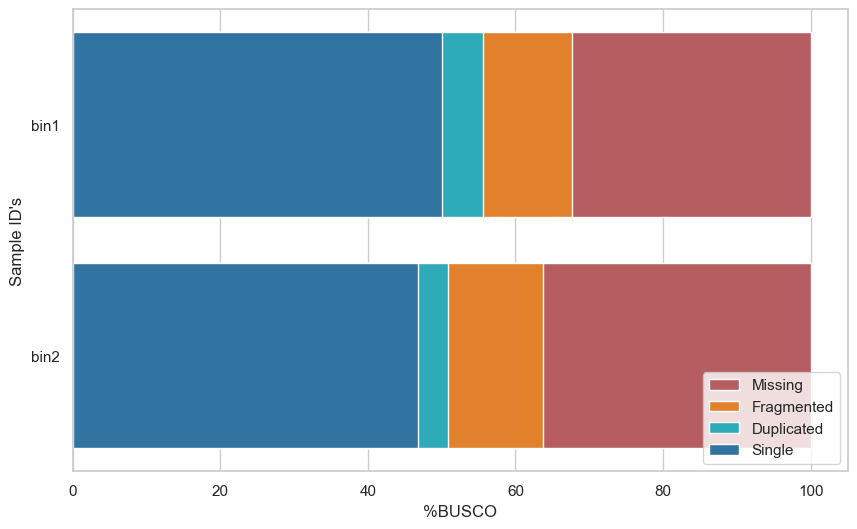

In [57]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Example data (same as in your code)
data = {
    'Input file': ['bin1.fasta', 'bin2.fasta'],
    'Dataset': ['bacteria_odb10', 'bacteria_odb10'],
    'Complete': [55.6, 50.8],
    'Single': [50.0, 46.8],
    'Duplicated': [5.6, 4.0],
    'Fragmented': [12.1, 12.9],
    'Missing': [32.3, 36.3],
    'n_markers': [124, 124],
    'Scaffold N50': [5383, 5627],
    'Contigs N50': [5383, 5627],
    'Percent gaps': ['0.000%', '0.000%'],
    'Number of scaffolds': [594, 537]
}

# Create a DataFrame
df = pd.DataFrame(data)
df["single"] = df["Single"]
df["duplicated"] = df["Single"] + df["Duplicated"]
df["fragmented"] = df["duplicated"] + df["Fragmented"]
df["missing"] = df["fragmented"] + df['Missing']
df["input_file"] = df["Input file"].str.split('.', expand=True)[0]

# Set the style
sns.set(style="whitegrid")
sns.set_palette("colorblind")

# Create a horizontal stacked barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, y='input_file', x='missing', color='r', label='Missing')
sns.barplot(data=df, y='input_file', x='fragmented', color='tab:orange', label='Fragmented')
sns.barplot(data=df, y='input_file', x='duplicated', color='tab:cyan', label='Duplicated')
sns.barplot(data=df, y='input_file', x='single', color='tab:blue', label='Single')

# Customize the plot
plt.xlabel('%BUSCO')
plt.ylabel("Sample ID's")
plt.legend(loc="lower right")

# Show the plot
plt.show()


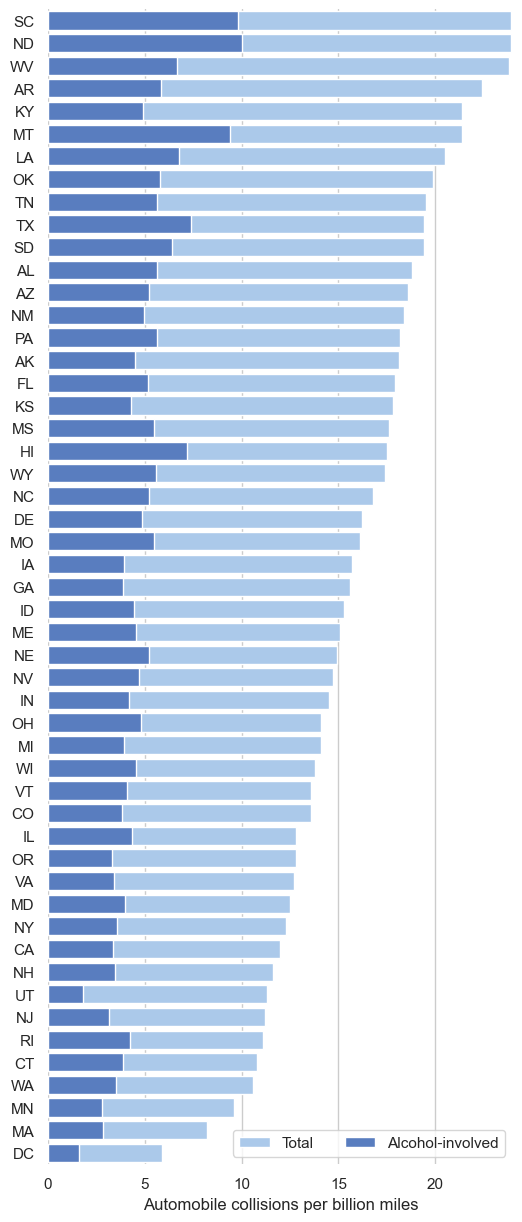

In [31]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [33]:
df['Number of scaffolds']

0    594
1    537
Name: Number of scaffolds, dtype: int64

In [41]:
df["input_file"] = df["Input file"].str.split('.', expand=True)[0]